<a href="https://colab.research.google.com/github/juaumm/PythonNotebooks/blob/main/PropertyPriceModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Settings for the plots
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
#The dataset we will use.
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/PropertyPriceModel/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#This shows how large the data is, and it's a decent size.
df1.shape

(13320, 9)

In [ ]:
#Area types.
df1.groupby('area_type').size()

,0
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
#We are dropping columns that we assume are irrelevant.
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
#Finding null values
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
#We can afford to drop NAs because we'll still have enough data.
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
#Looking at the unique 'size' values, we seem to have found a problem: theres no normalization.
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#Creating a new column named 'bhk' with the number of bedrooms normalized.
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-9-45d48f3d33b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
#checking bedroom numbers are correct. They are.
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
#Checking if 'total_sqft' is normalized. It's not.
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#This Function shows the values that are float(ex:10.0).
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
#We apply the function to the 'total_sqft' column but choose to show the values that are not floats. We find that there are values in a range and in square meters. Let's fix that next.
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
#This function looks for a '-', splits the numbers into two tokens, checks if there are indeed two and then returns their average as a float value. If there are not two tokens, it returns None.
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
#Make a copy of the DataFrame and then apply the function to the 'total_sqft' column to normalize the values.
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


With this, we conclude our **data cleaning** efforts for now and begin the process of **feature engineering**.



In [ ]:
#Make a copy of the DataFrame and then create a new column 'price_per_sqft'
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] #The price is in lakh rupees, We multiply it by one hundred thousand to convert it to rupees
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
#We removed unecessary spaces and displayed location statistics. We've discovered that there are too many locations to work with, so let's adress that next.
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location').size().sort_values(ascending=False)
location_stats, len(location_stats)

(location
 Whitefield               535
 Sarjapur  Road           392
 Electronic City          304
 Kanakpura Road           266
 Thanisandra              236
                         ... 
 1 Giri Nagar               1
 Kanakapura Road,           1
 Kanakapura main  Road      1
 Karnataka Shabarimala      1
 whitefiled                 1
 Length: 1293, dtype: int64,
 1293)

In [ ]:
#Comparing the lenght of locations with less than ten instances to the whole.
len(location_stats), len(location_stats[location_stats <= 10])

(1293, 1052)

In [ ]:
#Filtering the locations with less than 10 instances into a variable
less_than_10 = location_stats[location_stats <= 10]
less_than_10

,0
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
#Apply a function to rename the less_than_10 locations to 'other'
df5.location = df5.location.apply(lambda x: 'other' if x in less_than_10 else x)
len(df5.location.unique())

242

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Now we go to Outlier Removal

We asked the expert in house marketing and stablished that the minimum total_sqft per bedrooms has to be 300 sqft. Anything bellow that will be treated as an outlier

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
#We removed a few outliers with houses that have less than 300 square foot per bedroom
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df5.shape, df6.shape

((13246, 7), (12502, 7))

Now, We will check the outliers in prices


In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
#By running this function, we will remove houses in each location that fall outside the standard deviation for price per square foot.
def remove_outliers_std(df):
    # List to store reduced DataFrames
    df_list = []

    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Filter based on the price_per_sqft within one std deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]

        df_list.append(reduced_df)

    # Concatenate all filtered DataFrames in one go for efficiency
    df_out = pd.concat(df_list, ignore_index=True)

    return df_out

# Applying the function
df7 = remove_outliers_std(df6)
df7.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [ ]:
#We removed 2 thousand houses, but we still have enough data to work with.
df6.shape, df7.shape

((12502, 7), (10241, 7))

Now we need to look at price per bedroom and total square foot area

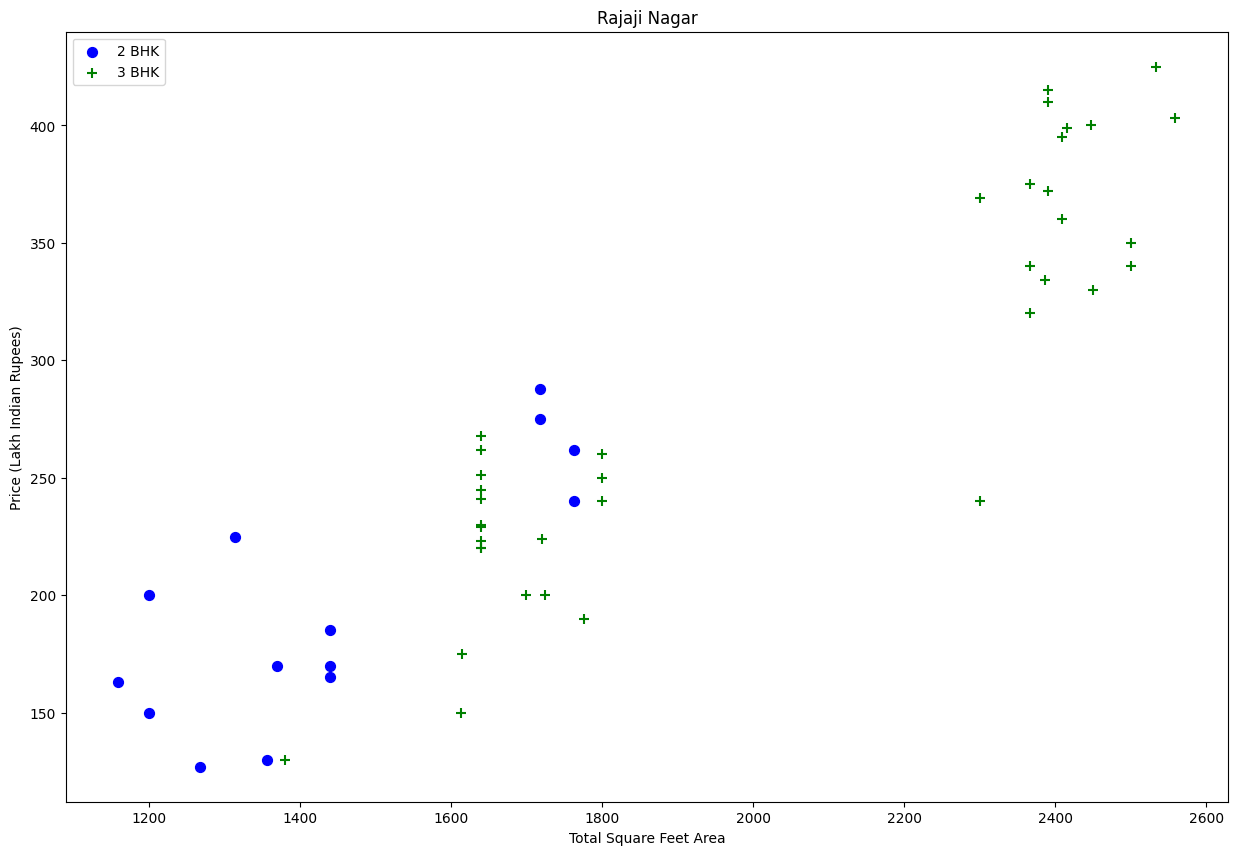

In [ ]:
# With this function we can plot and find some price outliers
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, "Rajaji Nagar")


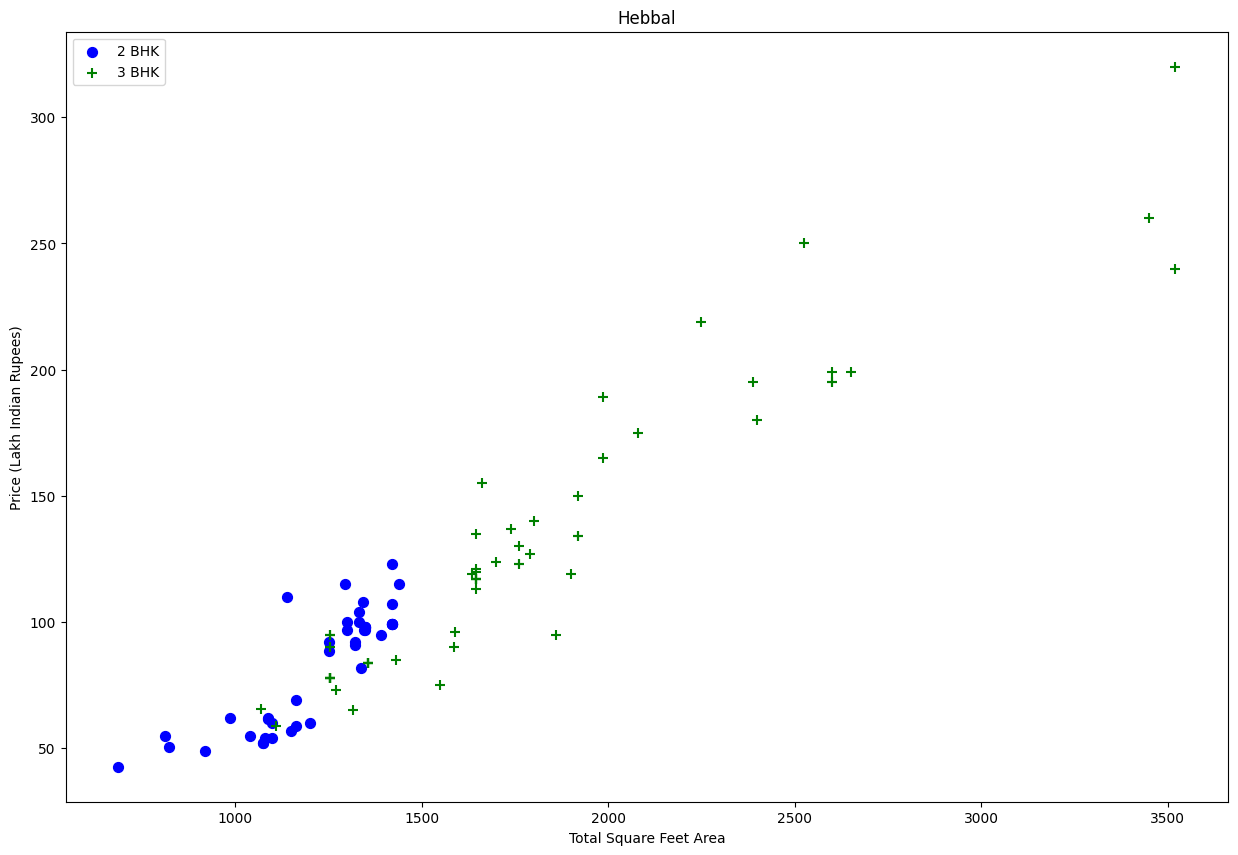

In [ ]:
#Same plot but another location
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, "Hebbal")

The plots show some houses with **more bedrooms** and the **same total area** having **lower prices**. This is an **outlier**, as houses with **more bedrooms** and **the same total area** should be **more expensive** or at least priced similarly.

In [ ]:
#This function groups houses by location and removes those priced lower than expected. Specifically, it filters out houses priced below the mean of houses with one fewer bedroom in the same location and average total area.
def remove_bhk_outliers(df):
    exclude_indices = []
    for location, location_df in df.groupby('location'):
        # Calculate mean and std for each BHK
        bhk_stats = {
            bhk: {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('bhk')
        }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices.extend(bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)

    return df.drop(exclude_indices, axis='index')

# Apply the function and compare shapes
df8 = remove_bhk_outliers(df7)
df7.shape, df8.shape


((10241, 7), (7329, 7))

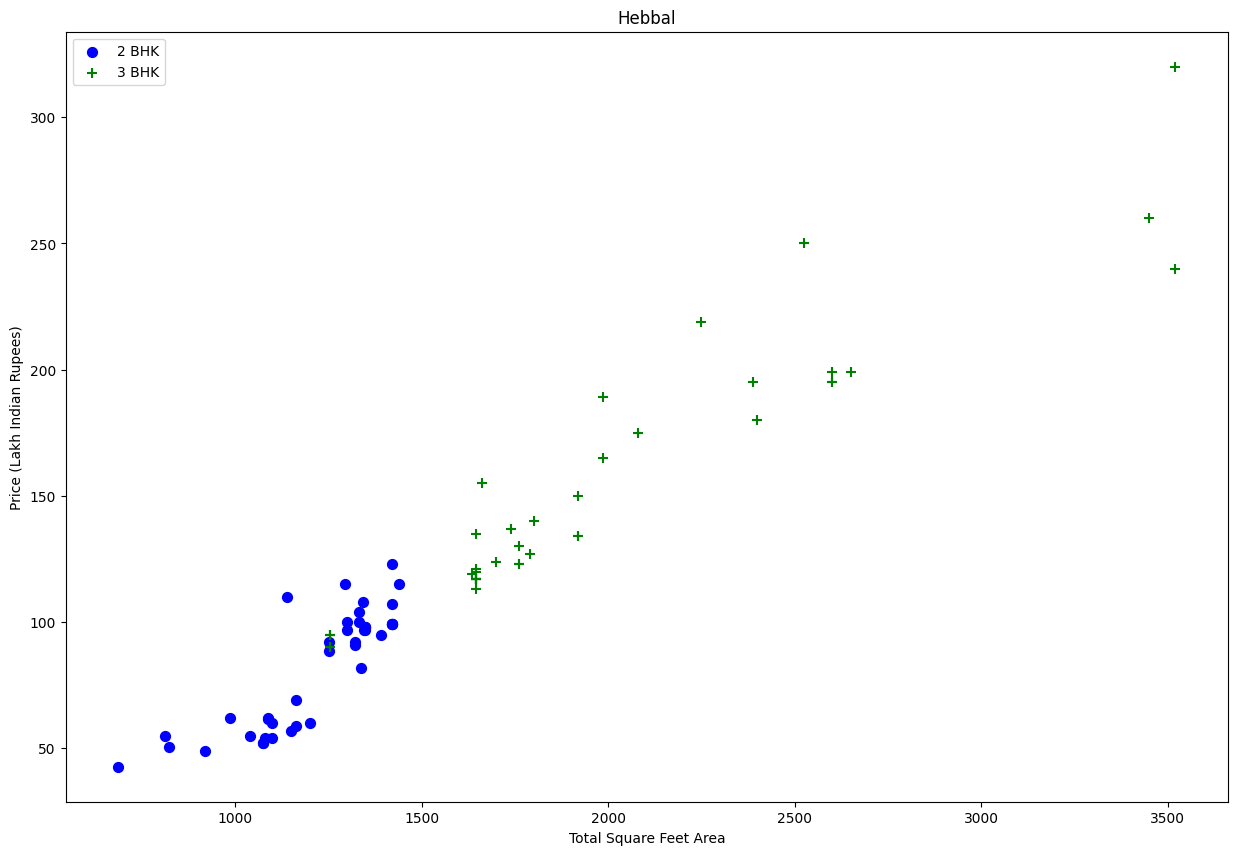

In [ ]:
plot_scatter_chart(df8, "Hebbal")

Now we will look at **bathrooms**.

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

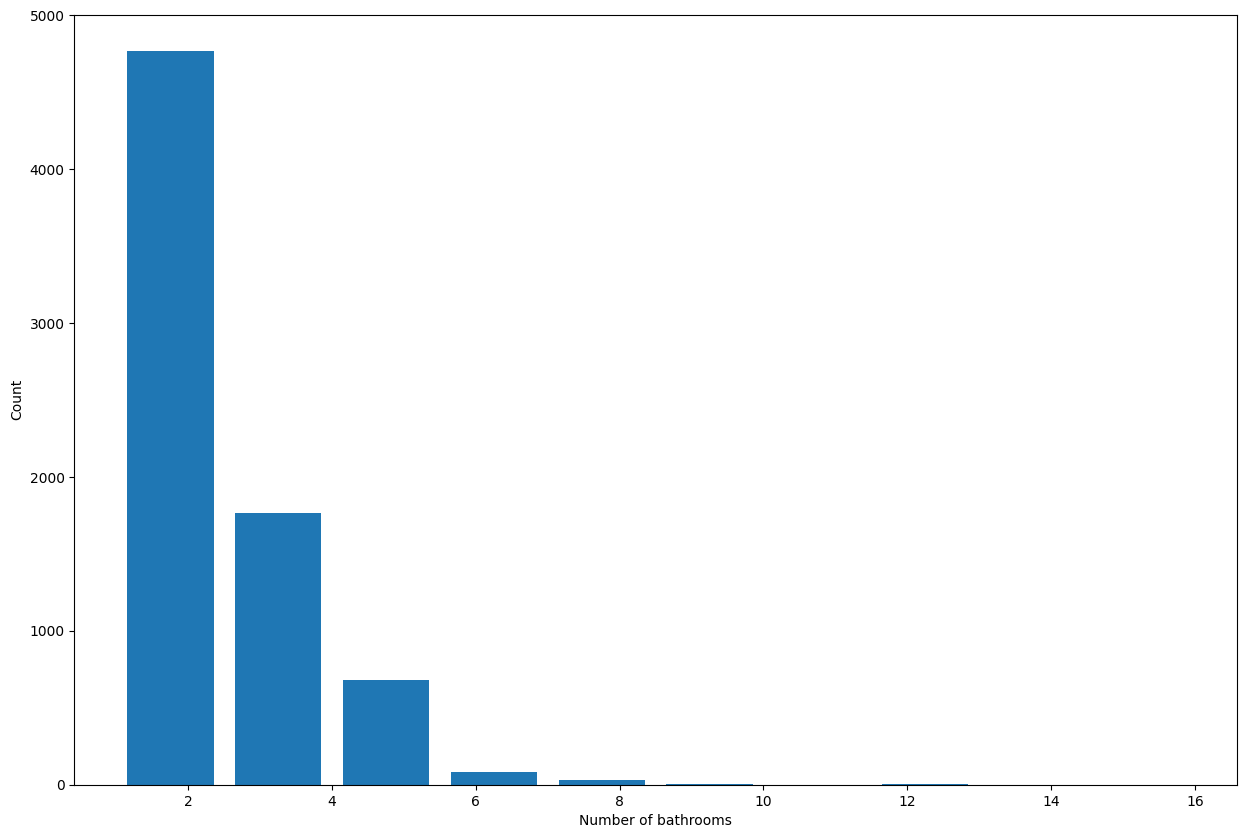

In [ ]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

After consulting with experts, we decided to **filter out** houses where the **number of bathrooms exceeds the number of bedrooms by more than two**.

In [ ]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
#We still have a good portion of the data to work with
df9 = df8[df8.bath < df8.bhk + 2 ]
df8.shape, df9.shape

((7329, 7), (7251, 7))

Lastly we can remove irrelevant columns to finally begin to create our machine leaning model

In [ ]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# This method is necessary to train the model with 'location', we also have to drop one of the locations to avoid issues of multicollinearity.
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Droping location because we don't need it anymore.
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12.shape

(7251, 245)

In [ ]:
# 'X' is the independent variables.
X = df12.drop(['price'], axis='columns')
X.head()

In [ ]:
# 'Y' is the dependent variable 'price', our target variable.
Y = df12.price
Y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [ ]:
# Spliting the dataset into test and traning.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
# This is out linear Regression model. The score 0.84 is very good.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.8452277697874329

In [ ]:
# This shows how well the model performs across different subsets of data. It's still solid.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(LinearRegression(), X, Y, cv=cv)

print("Cross-validation scores:", scores)


Cross-validation scores: [0.82430186 0.77166234 0.85089567 0.80837764 0.83653286]


In [ ]:
# Here we create a function that make 3 different models and return their performance scores to evaluate which one is the best for our data. Linear Regression is the best.

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True]},
             'solver': ['auto']
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X, Y)


,model,best_score,best_params
0,linear_regression,0.818354,{'fit_intercept': True}
1,lasso,0.687456,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714355,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# This is a function that will predict the price based on our input. We need to do this mainly because the locations are spread on different columns.

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0] #If the specified location exists in X.columns, loc_index will hold its index.
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [ ]:
# Here's a prediction using the final function on our linear Regression model. It looks good.

predict_price('1st Phase JP Nagar',1000, 2, 2), predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(83.49904677188148, 86.80519395214823)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2), predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(181.27815484006715, 184.5843020203339)

In [ ]:
# Downloading the trained model as a pickle file.

import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

from google.colab import files
files.download('banglore_home_prices_model.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Downloading the column names as a json file

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

from google.colab import files
files.download("columns.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>